In [3]:
import dataiku
from dataiku import pandasutils as pdu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [4]:
mydataset = dataiku.Dataset("df_test_scored")
df_res = mydataset.get_dataframe()

In [5]:
df_res.shape

(26304, 18)

In [6]:
df_res.tail()

,Date,numero_semaine,printemps,ete,automne,hiver,jour_de_la_semaine,semaine,weekend,heure,heure_creuse,heure_pleine,conso_normale,Trend_Season_Fit,Résidus_h,Résidus_h_avg,Résidus_h_stddev,prediction
26299,2021-01-01 05:00:00+00:00,53,0,0,1,0,5,1,0,5,1,0,0,57280.603355,1822.396645,-4647.571089,5816.169753,-9989.962393
26300,2020-12-30 05:00:00+00:00,53,0,0,1,0,3,1,0,5,1,0,0,57136.059379,111.940621,-4647.571089,5816.169753,-10535.374161
26301,2021-01-03 05:00:00+00:00,53,0,0,1,0,7,0,1,5,1,0,0,57454.743453,3046.256547,-4647.571089,5816.169753,-8125.011813
26302,2020-12-31 05:00:00+00:00,53,0,0,1,0,4,1,0,5,1,0,0,57204.708626,134.291374,-4647.571089,5816.169753,-10038.499099
26303,2020-12-28 05:00:00+00:00,53,0,0,1,0,1,1,0,5,1,0,0,57019.628269,-2535.628269,-4647.571089,5816.169753,-10735.447789


In [7]:
# Methode 1 : Vectorisation
def vec(df):
    return (
    1*((df['semaine'] == 1) & (df['prediction'] >0))
    )

In [8]:
%timeit df_res['trigger'] = vec(df_res)

782 µs ± 110 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
df_res[['semaine','prediction','trigger']]

,semaine,prediction,trigger
0,1,2772.578048,1
1,1,2772.578048,1
2,1,3122.642429,1
3,1,-689.331767,0
4,0,3081.030944,0
...,...,...,...
26299,1,-9989.962393,0
26300,1,-10535.374161,0
26301,0,-8125.011813,0
26302,1,-10038.499099,0


In [10]:
# Methode 2 : apply /lignes
def find_trigger(wk:int, pred:float) -> int:
    return ( 1*((wk == 1) & (pred >0)) ) 

In [11]:
def apply_impl(df):
    return df.apply(
        lambda row:
        find_trigger(
          row.semaine, row.prediction),
      axis=1
    )

In [12]:
%timeit df_res['trigger_apply'] = apply_impl(df_res)

577 ms ± 59.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**La vectorisation est x1000 plus rapide que .apply /lignes**

In [13]:
# Vérification de si les résultats sont bien identiques
df_res['trigger_apply'].to_list() == df_res['trigger'].to_list()

True

# Normalisation

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

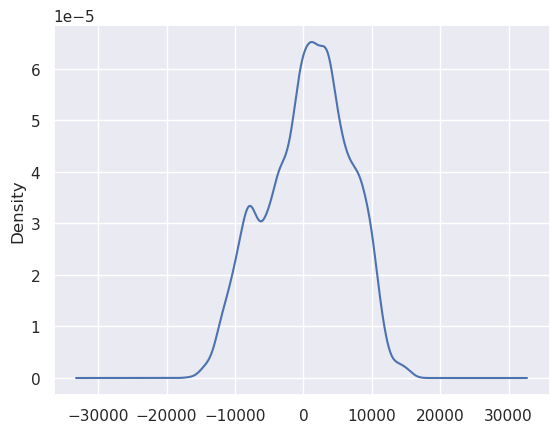

In [14]:
'''Plot distribution of values in points column.
Note that kind=’kde’ tells pandas to use kernel density estimation, which produces a smooth curve that summarizes the distribution of values for a variable.
If you’d like to create a histogram instead, you can specify kind=’hist’
'''

sns.set()
df_res['prediction'].plot(kind='kde')

In [15]:
t = np.asarray(df_res['prediction'])
t = t.reshape(-1,1)

sc_t = StandardScaler()

t_transformed = sc_t.fit_transform(t)

In [16]:
type(t_transformed)

numpy.ndarray

In [17]:
df_res["normalized_pred"] = t_transformed

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

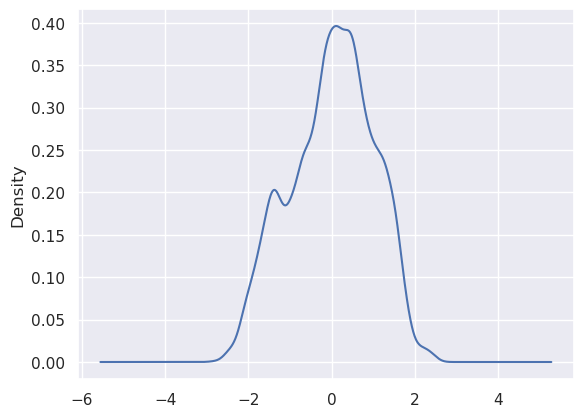

In [18]:
sns.set()
df_res['normalized_pred'].plot(kind='kde')

In [19]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal')
t_trans = quantile_transformer.fit_transform(t)

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2114: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.9':
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [20]:
type(t_trans)

numpy.ndarray

In [21]:
df_res["pred_quantile_transformed"] = t_transformed

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
t_minmax = min_max_scaler.fit_transform(t)
df_res["pred_MinMax"] = t_minmax

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

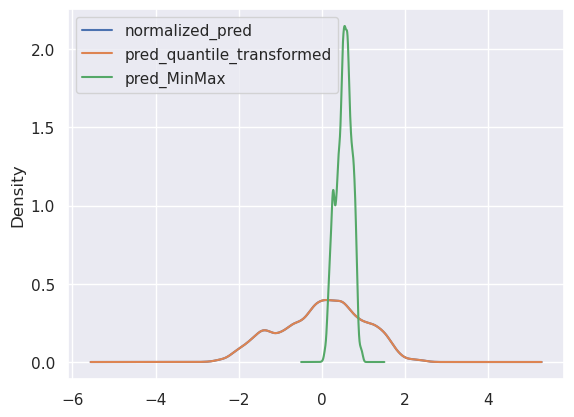

In [23]:
sns.set()
df_res[['normalized_pred','pred_quantile_transformed','pred_MinMax']].plot(kind='kde')

In [24]:
max_abs_scaler = preprocessing.MaxAbsScaler()
t_train_maxabs = max_abs_scaler.fit_transform(t)
df_res["pred_MaxAbs"] = t_train_maxabs

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

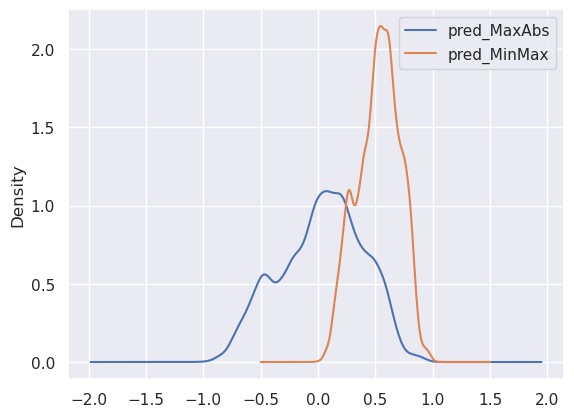

In [25]:
sns.set()
df_res[['pred_MaxAbs','pred_MinMax']].plot(kind='kde')

In [26]:
t_L2_normalized = preprocessing.normalize(t, norm='l2')
df_res["pred_L2_normalized"] = t_L2_normalized

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

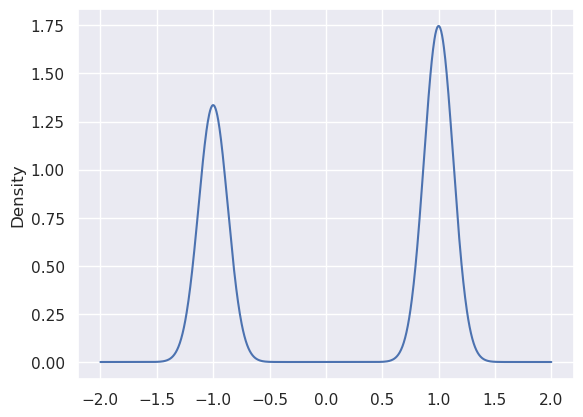

In [27]:
sns.set()
df_res['pred_L2_normalized'].plot(kind='kde')

In [28]:
df_res[['pred_L2_normalized']].describe()

,pred_L2_normalized
count,26304.000000
mean,0.133440
std,0.991076
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [29]:
t_L1_normalized = preprocessing.normalize(t, norm='l1')
df_res["pred_L1_normalized"] = t_L1_normalized

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

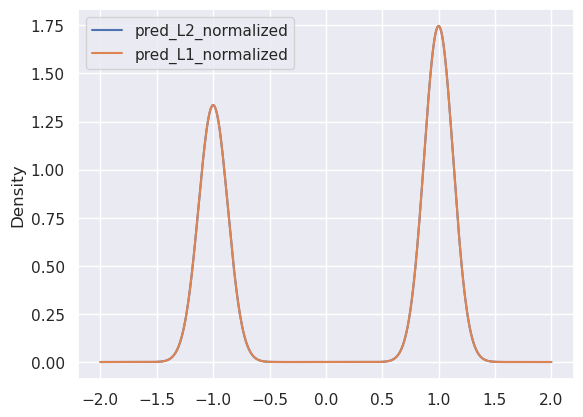

In [30]:
sns.set()
df_res[['pred_L2_normalized','pred_L1_normalized']].plot(kind='kde')

In [31]:
# transformer selon fonction
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
# Since FunctionTransformer is no-op during fit, we can call transform directly
df_res["pred_transformre_perso"] = transformer.transform(t)

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:201: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))


/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

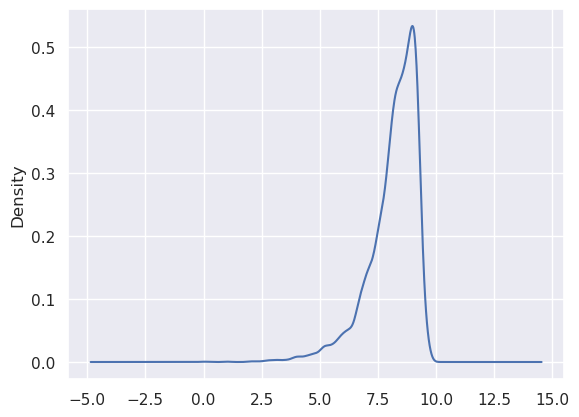

In [32]:
sns.set()
df_res['pred_transformre_perso'].plot(kind='kde')

In [33]:
# Normalisation manuelle
pred_mean = df_res["prediction"].mean()
pred_min = df_res["prediction"].min()
pred_max = df_res["prediction"].max()

In [34]:
def normalize(x):
    x_new = ((x - pred_mean) / (pred_max - pred_min))
    return x_new

In [35]:
%timeit df_res['pred_manual_norm'] = [normalize(e) for e in df_res['prediction']]

9.25 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
%timeit test = (df_res['prediction'] - pred_mean)/(pred_max - pred_min)

202 µs ± 8.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [38]:
test = (df_res['prediction'] - pred_mean)/(pred_max - pred_min)
test.to_list() == df_res['pred_manual_norm'].to_list()

True

<AxesSubplot:ylabel='Density'>

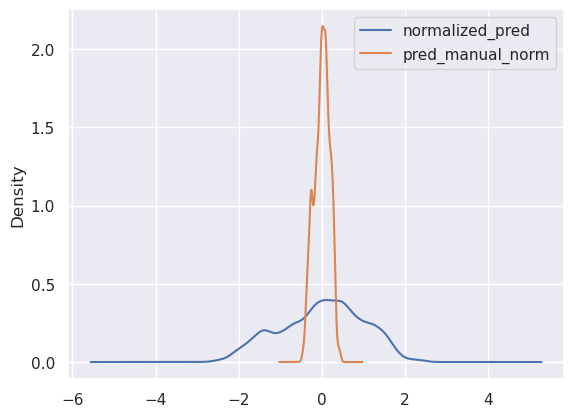

In [39]:
df_res[['normalized_pred','pred_manual_norm']].plot(kind='kde')

In [41]:
df_res["Robust"] = RobustScaler(quantile_range=(25, 75)).fit_transform(t)
df_res["PT_yeo"] = PowerTransformer(method="yeo-johnson").fit_transform(t)
#The Box-Cox transformation can only be applied to strictly positive data
#df_res["PT_bc"] = PowerTransformer(method="box-cox").fit_transform(t)
df_res["Quantile_uni"] = QuantileTransformer(output_distribution="uniform").fit_transform(t)

/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2114: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.9':
/applis/upr054/pur/uiuxpr054000001/code-envs/python/py_v39_Admin/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:ylabel='Density'>

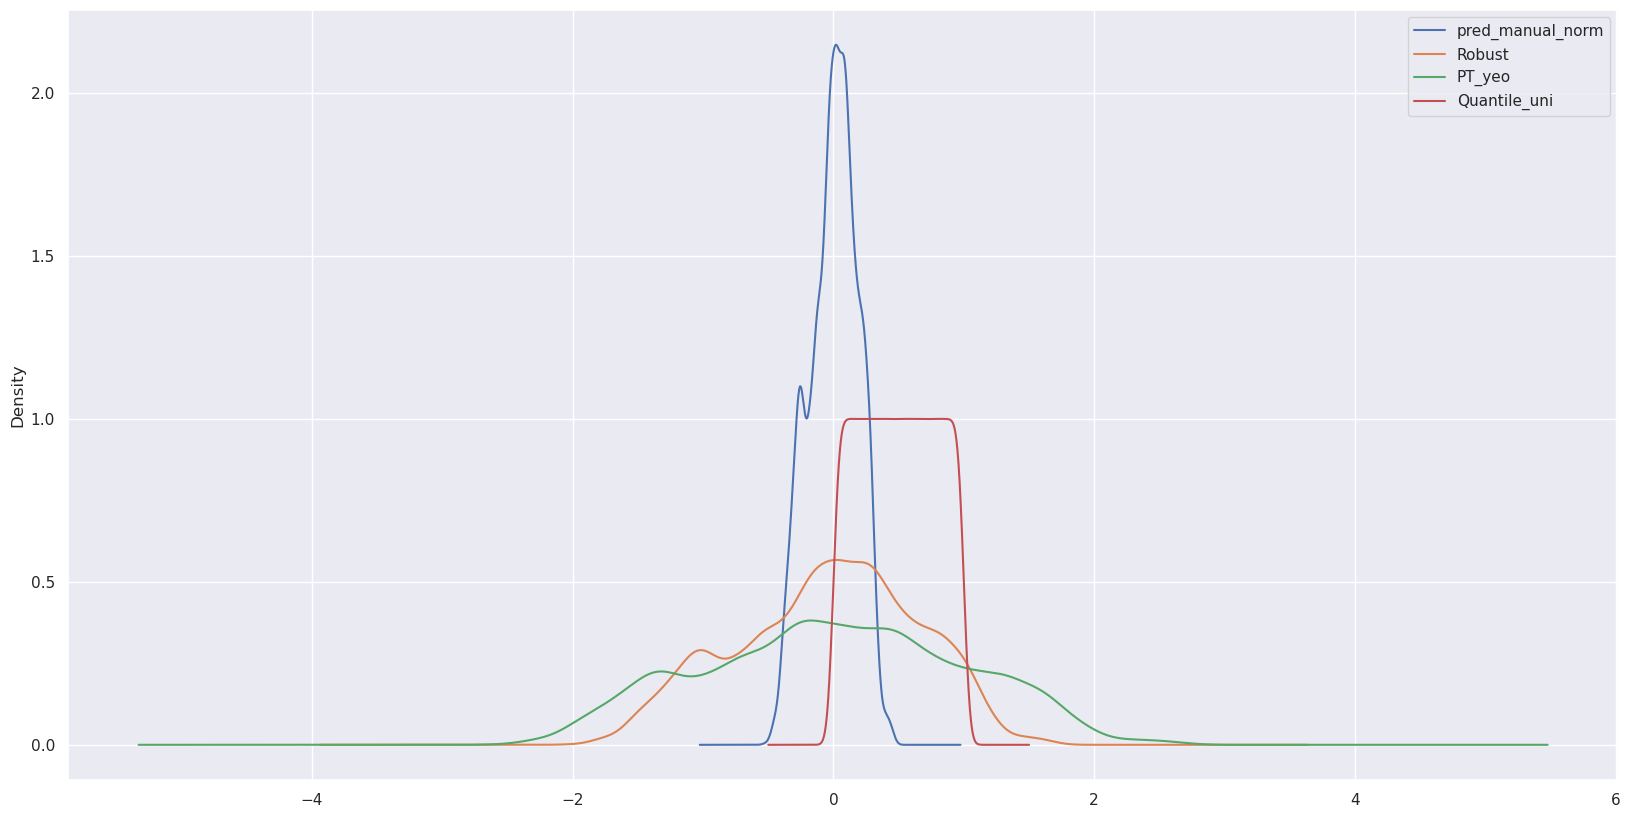

In [42]:
df_res[['pred_manual_norm','Robust','PT_yeo','Quantile_uni']].plot(kind='kde', figsize=(20,10))

### ChatGPT recommendations

Here are a few tips to help you prepare your data:
<br><br>
<li>Clean and preprocess your data: Make sure your data is clean, without any missing or erroneous values, and in a format that can be easily processed by your chosen model. You may need to preprocess your data by converting categorical features to numerical ones, scaling your features, and removing outliers.</li>
<br>
<li>Split your data into training and validation sets: To avoid overfitting, it's important to evaluate your model on a separate validation set that was not used during training. Typically, a random split of around 70-80% of your data for training and the remaining 20-30% for validation is a good starting point.</li>
<br>
<li>Feature engineering: Feature engineering is the process of creating new features from the existing ones. This can help improve the performance of your model. Feature engineering can include creating interaction terms, adding new polynomial features, and creating new features using domain knowledge.</li>
<br>
<li>Encoding categorical features: XGBoost and LightGBM require numerical inputs, so you'll need to encode categorical features. One common technique is one-hot encoding, which creates a binary indicator variable for each category.</li>
<br>
<li>Handling imbalanced classes: If your data has imbalanced classes, you may need to balance the classes by undersampling the majority class or oversampling the minority class to improve the performance of your model.</li>
<br>
<li>Hyperparameter tuning: Both XGBoost and LightGBM have many hyperparameters that can affect the performance of your model. You should try different combinations of hyperparameters using techniques like grid search or randomized search to find the best set of hyperparameters for your problem.</li>

#### About distributions ####
The normal distribution, also known as the Gaussian distribution, is a commonly used probability distribution in statistics. While it can be helpful for some statistical analyses, it is not strictly necessary for your data to be normally distributed when training XGBoost or LightGBM models.
<br><br>
In fact, decision tree-based models like XGBoost and LightGBM are known to be robust to non-normal distributions of data. This is because these models partition the feature space into regions that best separate the target variable, and they are not influenced by the distribution of individual features.
<br><br>
That being said, some transformations such as logarithmic transformation, Box-Cox transformation, or other power transformations can sometimes help to make the distribution of numerical features more normal or to make the relationship between features and target variable more linear, which may lead to improved model performance. These transformations can also help to reduce the impact of outliers and make the data more homogeneous.
<br><br>
In summary, it is not necessary for numerical features to be normally distributed when training XGBoost or LightGBM models, but transforming the data to be more normal or addressing non-linear relationships can sometimes improve model performance.